In [142]:
import pandas as pd
import numpy as np

In [143]:
vis_data = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0


In [144]:
vis_data.describe()

,client_id,age,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,2.000339,1.575509,2.496280,41099.775417,0.126994
std,31841.921168,11.520378,0.804272,0.371087,2.252073,0.527631,0.689818,46166.322400,0.332968
min,1.000000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1000.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20000.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,1.000000,2.000000,3.000000,30000.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,3.000000,2.000000,3.000000,48000.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,53.000000,3.000000,3.000000,1000000.000000,1.000000


In [145]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [146]:
vis_data.isnull().sum(axis = 0)

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

In [148]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('./data/train.csv')
df = data.fillna(data.mode().iloc[0])
train, validation = train_test_split(df, test_size=0.33, random_state=42)

/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


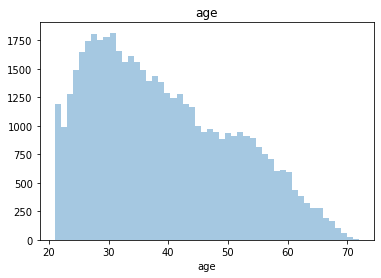

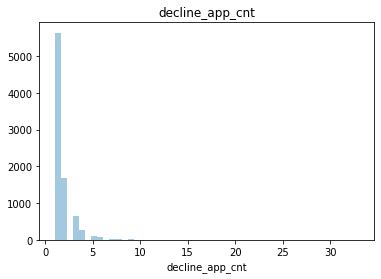

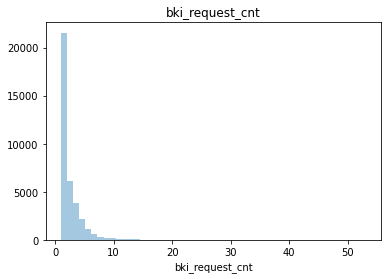

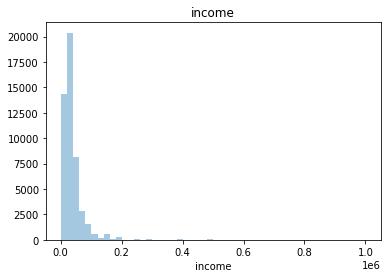

In [149]:
#бинарные переменные 
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

#числовые переменные
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


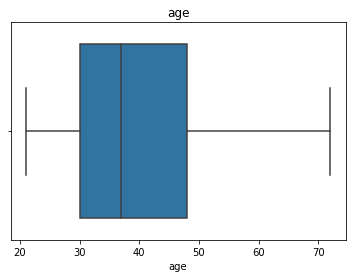

/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


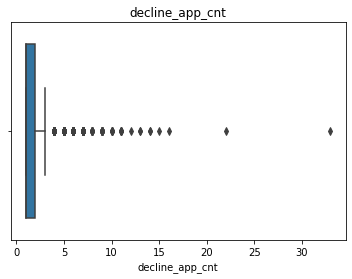

/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


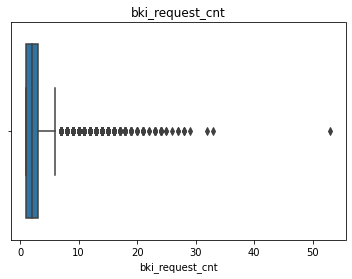

/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


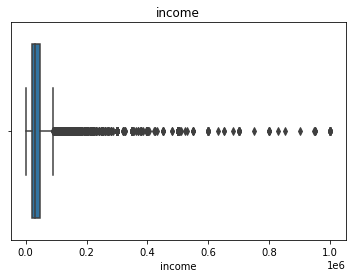

In [150]:
for i in num_cols:
    plt.figure()
    sns.boxplot(train[i][train[i] > 0].dropna())
    plt.title(i)
    plt.show()

In [151]:
cnts = train.decline_app_cnt.value_counts()
cnts

0     40970
1      5637
2      1677
3       639
4       257
5       111
6        73
7        33
9        15
8        11
10        7
11        6
14        2
13        2
33        1
22        1
16        1
12        1
15        1
Name: decline_app_cnt, dtype: int64

<AxesSubplot:>

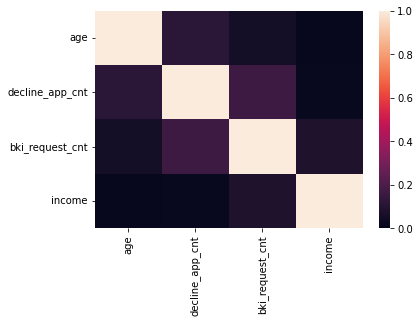

In [152]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)

<AxesSubplot:>

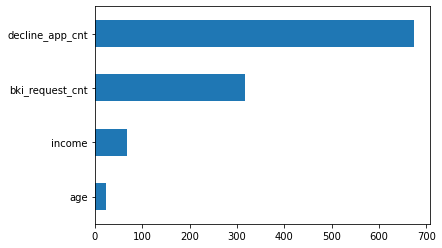

In [153]:
from sklearn.feature_selection import f_classif
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [154]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(train['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [155]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])

train["education"] = label_encoder.fit_transform(train["education"].astype(str))
    
# убедимся в преобразовании    
train.head()

/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_29196/1324612716.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column] = label_encoder.fit_transform(train[column])
/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_29196/1324612716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["education"] = label_encoder.fit_transform(train["education"].astype(str))


,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
8931,104346,1,0,27,0,0,0,0,3,2,3,30000,0,0
63915,56248,1,0,47,0,0,0,0,4,1,2,20000,0,0
45568,59433,3,0,47,0,0,0,0,0,2,3,45000,0,0
3391,21096,3,0,32,0,0,0,0,3,2,3,21000,0,1
40660,18878,3,0,31,0,0,0,1,6,2,3,30000,1,0


In [156]:
from sklearn.preprocessing import OneHotEncoder
X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
pd.DataFrame(X_cat)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49440,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
49441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
49442,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
49443,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

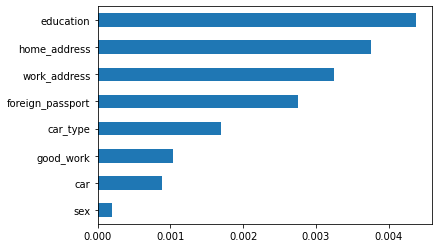

In [157]:
from sklearn.feature_selection import mutual_info_classif
imp_cat = pd.Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [159]:
# Стандартизация числовых переменных
from sklearn.preprocessing import StandardScaler
X_num = StandardScaler().fit_transform(train[num_cols].values)
pd.DataFrame(X_num)

,0,1,2,3
0,-1.069945,-0.345195,0.443987,-0.239916
1,0.669278,-0.345195,0.888990,-0.457938
2,0.669278,-0.345195,-0.891024,0.087117
3,-0.635139,-0.345195,0.443987,-0.436136
4,-0.722100,-0.345195,1.778997,-0.239916
...,...,...,...,...
49440,-0.982984,0.903300,1.333994,-0.196311
49441,1.278006,-0.345195,1.778997,0.850194
49442,-0.809062,-0.345195,0.888990,0.087117
49443,-0.374256,-0.345195,-0.446021,-0.239916


In [160]:
X_train = np.hstack([X_num, train[bin_cols].values, X_cat])
y_train = train['default'].values

In [163]:
validation.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
68068,66799,UGR,F,29,N,N,1,0,3,1,2,23000,N,0
60795,25379,SCH,M,58,N,N,0,0,2,1,2,15000,N,0
5365,28825,GRD,F,69,N,N,0,0,0,2,3,23500,N,1
27565,37530,UGR,M,27,Y,Y,0,0,0,2,3,65000,N,0
72235,4264,GRD,F,32,N,N,1,0,6,2,3,25000,N,1


In [166]:
label_encoder = LabelEncoder()

for column in bin_cols:
    validation[column] = label_encoder.fit_transform(validation[column])

validation["education"] = label_encoder.fit_transform(validation["education"].astype(str))
    
# убедимся в преобразовании    
validation.head()

/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_29196/135196353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation[column] = label_encoder.fit_transform(validation[column])
/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_29196/135196353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["education"] = label_encoder.fit_transform(validation["education"].astype(str))


,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
68068,66799,4,0,29,0,0,1,0,3,1,2,23000,0,0
60795,25379,3,1,58,0,0,0,0,2,1,2,15000,0,0
5365,28825,1,0,69,0,0,0,0,0,2,3,23500,0,1
27565,37530,4,1,27,1,1,0,0,0,2,3,65000,0,0
72235,4264,1,0,32,0,0,1,0,6,2,3,25000,0,1


In [167]:
X_cat_val = OneHotEncoder(sparse = False).fit_transform(validation[cat_cols].values)
pd.DataFrame(X_cat_val)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24349,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
24350,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
24351,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
24352,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [168]:
X_num_val = StandardScaler().fit_transform(validation[num_cols].values)
pd.DataFrame(X_num_val)

,0,1,2,3
0,-0.885085,0.894966,0.443697,-0.391172
1,1.623022,-0.338188,0.001597,-0.562233
2,2.574373,-0.338188,-0.882601,-0.380480
3,-1.058058,-0.338188,-0.882601,0.506902
4,-0.625626,0.894966,1.769994,-0.348406
...,...,...,...,...
24349,0.758157,-0.338188,-0.882601,-0.348406
24350,0.844644,-0.338188,0.443697,0.720729
24351,-0.971572,-0.338188,-0.440502,0.934557
24352,0.498698,0.894966,-0.882601,0.186162


In [170]:
X_validation = np.hstack([X_num_val, validation[bin_cols].values, X_cat_val])
y_true = validation['default'].values

In [191]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg').fit(X_train, y_train)
y_pred = model.predict(X_validation)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [192]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[21255,    39],
       [ 3031,    29]])

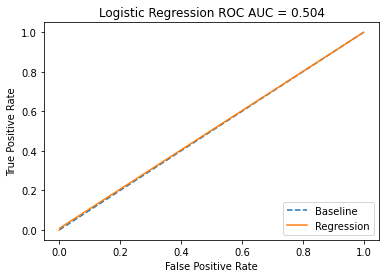

In [195]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

y_pred_proba = model.predict(X_validation)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [211]:
classification_report(y_true, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.93     21294\n           1       0.43      0.01      0.02      3060\n\n    accuracy                           0.87     24354\n   macro avg       0.65      0.50      0.48     24354\nweighted avg       0.82      0.87      0.82     24354\n'

              precision    recall  f1-score   support     

class 0       0.88      1.00      0.93     21294     
class 1       0.43      0.01      0.02      3060    

accuracy                           0.87     24354   
macro avg       0.65      0.50      0.48     24354
weighted avg       0.82      0.87      0.82     24354

In [210]:
np.log(40)

3.6888794541139363

In [212]:
from sklearn.model_selection import GridSearchCV
# запускаем GridSearch на небольшом кол-ве итераций max_iter=50 и с достаточно большой дельтой останова tol1e-3
# чтобы получить оптимальные параметры модели в первом приближении
model = LogisticRegression()

iter_ = 50
epsilon_stop = 1e-3

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

## model ваша модель логистической регрессии
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_

##печатаем параметры
best_parameters = model.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/il

	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 50
	multi_class: 'ovr'
	n_jobs: None
	penalty: 'l2'
	random_state: None
	solver: 'saga'
	tol: 0.001
	verbose: 0
	warm_start: False


/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
